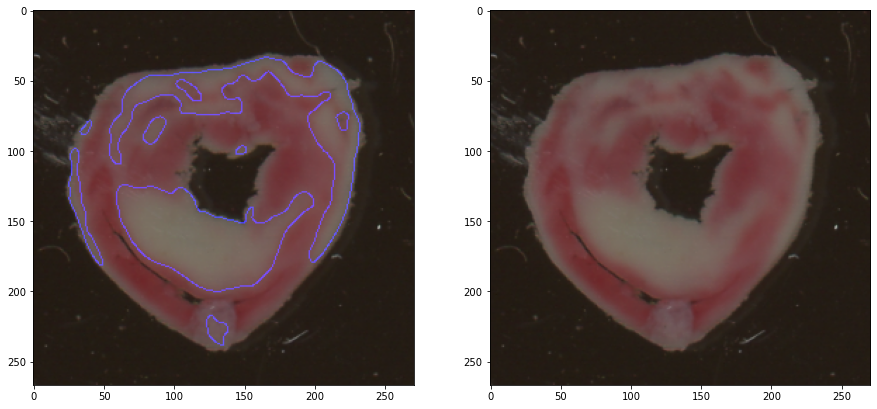

In [228]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_name = '14_2_3'
threshold = 90

img = cv2.imread('../BUCL_Data/#14/%s.png' % file_name)
img_og = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

def show_pics(img1):
    fig = plt.figure(figsize = (15,15))
    rows = 1
    cols = 2
    fig.add_subplot(rows,cols,1)
    plt.imshow(img1)
    fig.add_subplot(rows,cols,2)
    plt.imshow(img_og)
    
mblur = cv2.medianBlur(img,7)

#threshold varies from 65 to 95 generally:
ret,th1 = cv2.threshold(mblur,threshold,255,cv2.THRESH_BINARY)

bblur = cv2.bilateralFilter(th1,9,75,75)

edges = cv2.Canny(bblur,127,127)

mask = cv2.cvtColor(edges,cv2.COLOR_BGR2RGB)

black_pixels = np.where(
    (mask[:, :, 0] == 255) & 
    (mask[:, :, 1] == 255) & 
    (mask[:, :, 2] == 255)
)

# set those pixels to white
mask[black_pixels] = [0, 0, 255]

blended = cv2.addWeighted(img_og,1,mask,1,gamma=0)
show_pics(blended)

In [224]:
cv2.imwrite('maskdemo.jpg',bblur)

True

In [217]:
cv2.imwrite(file_name + '_' + str(threshold) + '_outline.jpg', cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))

True